<a href="https://colab.research.google.com/github/anoohyabhaskarla/INFO_5731/blob/main/Bhaskarla_Anoohya_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [ ]:
pip install gdown

In [ ]:
import gdown
import pandas as pd

# Google Drive file ID
file_id = "1nlO8BN86yknJso-kM-VDUnWsSMjt1CP0"
output = "Twitter_Data-2.csv"

# Download using gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# Load the CSV
df = pd.read_csv(output)

# Check basic info
print(df.info())
print(df['category'].value_counts())

# Map sentiment labels
df['sentiment'] = df['category'].map({-1: 'negative', 0: 'neutral', 1: 'positive'})



Downloading...
From: https://drive.google.com/uc?id=1nlO8BN86yknJso-kM-VDUnWsSMjt1CP0
To: /content/Twitter_Data-2.csv
100%|██████████| 20.9M/20.9M [00:00<00:00, 49.8MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


<ipython-input-8-7c45f20e1a1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


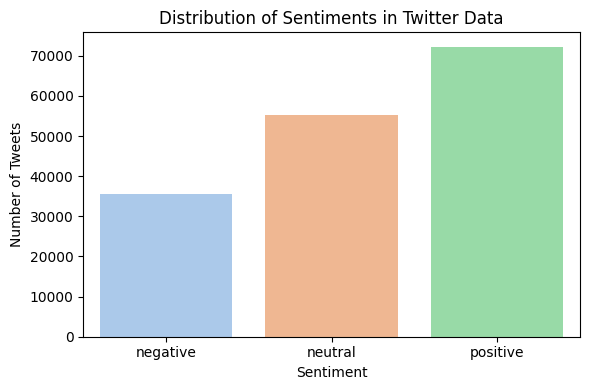

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot sentiment counts
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Distribution of Sentiments in Twitter Data")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', str(text))
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['processed_text'] = df['clean_text'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
print("\nSample cleaned tweets:")
print(df[['clean_text', 'processed_text', 'sentiment']].sample(5))



Sample cleaned tweets:
                                               clean_text  \
117224  keep this aap sympathiser ि ्ीा् away and send...   
38566                                want modi want pappu   
28197   story that’ never been told before watch the o...   
124610  niti aayog will continue modi will come more s...   
85180   and leisure they blame modi for destroying dem...   

                                           processed_text sentiment  
117224  keep aap sympathiser away send intolerant bigo...  negative  
38566                                want modi want pappu   neutral  
28197   story never told watch official trailer upcomi...   neutral  
124610  niti aayog continue modi come strong decide st...  positive  
85180   leisure blame modi destroying democratic insti...  negative  


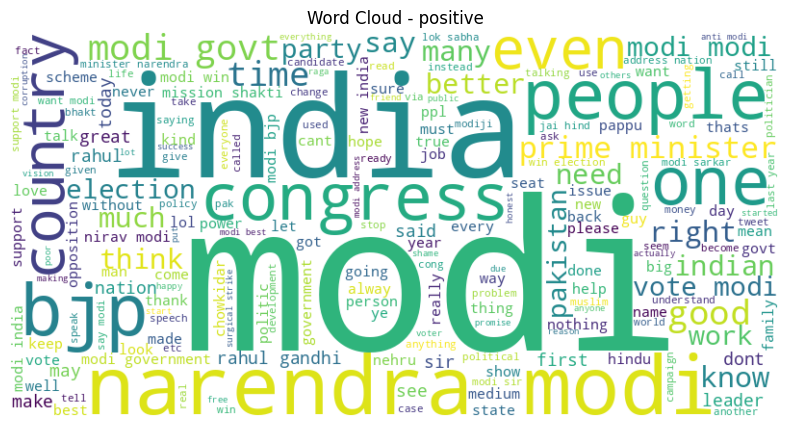

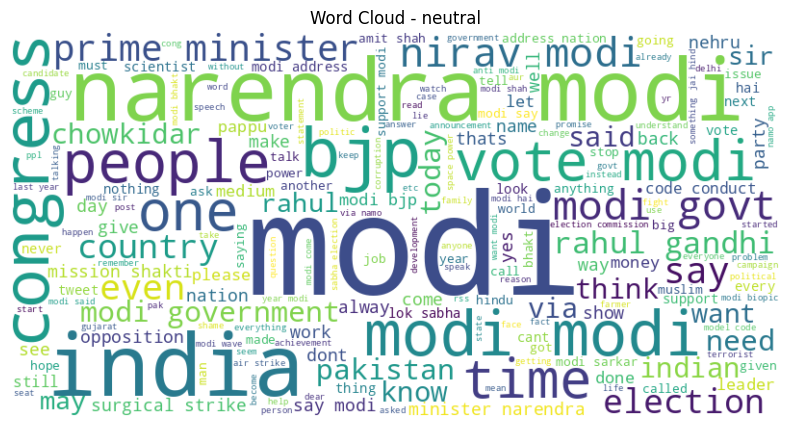

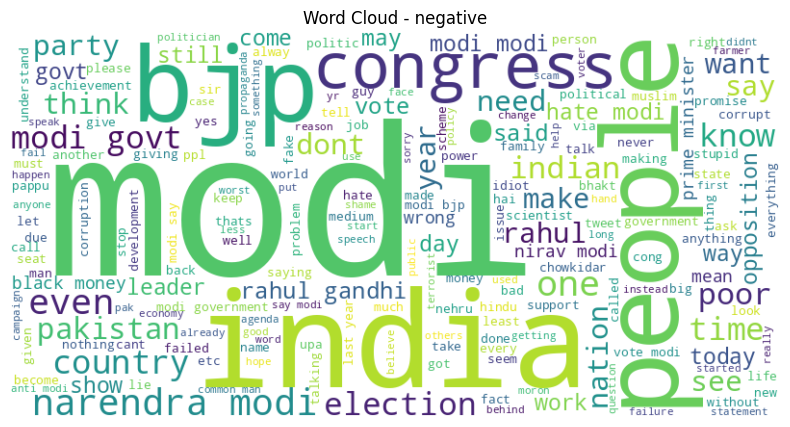

In [ ]:
from wordcloud import WordCloud

for sentiment in ['positive', 'neutral', 'negative']:
    text = " ".join(df[df['sentiment'] == sentiment]['processed_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud - {sentiment}")
    plt.axis('off')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing processed_text or sentiment
df = df.dropna(subset=['processed_text', 'sentiment'])

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['processed_text'])
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)





Naive Bayes - Evaluation Metrics:

              precision    recall  f1-score   support

    negative       0.87      0.42      0.57      7102
     neutral       0.82      0.65      0.72     11043
    positive       0.65      0.92      0.76     14450

    accuracy                           0.72     32595
   macro avg       0.78      0.66      0.68     32595
weighted avg       0.76      0.72      0.71     32595

Accuracy: 0.7189139438564197


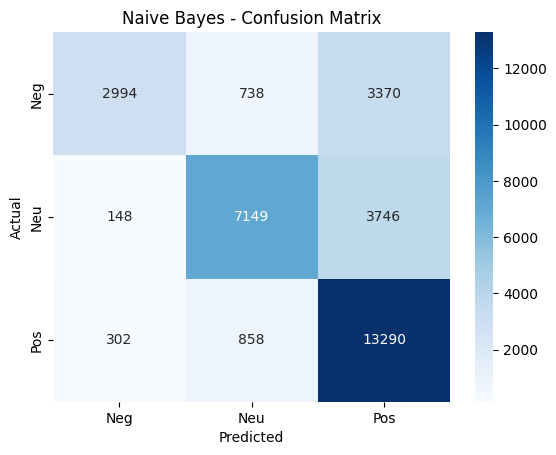

In [ ]:
# Model 1: Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} - Evaluation Metrics:\n")
    print(classification_report(y_true, y_pred))
    acc = accuracy_score(y_true, y_pred)
    print("Accuracy:", acc)

    cm = confusion_matrix(y_true, y_pred, labels=['negative', 'neutral', 'positive'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Neg', 'Neu', 'Pos'],
                yticklabels=['Neg', 'Neu', 'Pos'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Call the evaluation
evaluate_model("Naive Bayes", y_test, y_pred_nb)



Random Forest - Evaluation Metrics:

              precision    recall  f1-score   support

    negative       0.85      0.67      0.75      7102
     neutral       0.83      0.94      0.88     11043
    positive       0.87      0.87      0.87     14450

    accuracy                           0.85     32595
   macro avg       0.85      0.83      0.83     32595
weighted avg       0.85      0.85      0.85     32595

Accuracy: 0.8502224267525694


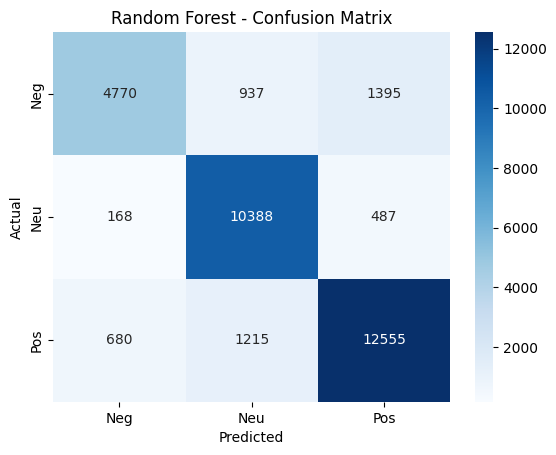

In [ ]:
# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} - Evaluation Metrics:\n")
    print(classification_report(y_true, y_pred))
    acc = accuracy_score(y_true, y_pred)
    print("Accuracy:", acc)

    cm = confusion_matrix(y_true, y_pred, labels=['negative', 'neutral', 'positive'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Neg', 'Neu', 'Pos'],
                yticklabels=['Neg', 'Neu', 'Pos'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Call the evaluation
evaluate_model("Random Forest", y_test, y_pred_rf)





Support Vector Machine - Evaluation Metrics:

              precision    recall  f1-score   support

    negative       0.87      0.79      0.83      7102
     neutral       0.87      0.96      0.91     11043
    positive       0.92      0.89      0.90     14450

    accuracy                           0.89     32595
   macro avg       0.89      0.88      0.88     32595
weighted avg       0.89      0.89      0.89     32595

Accuracy: 0.8913637060898911


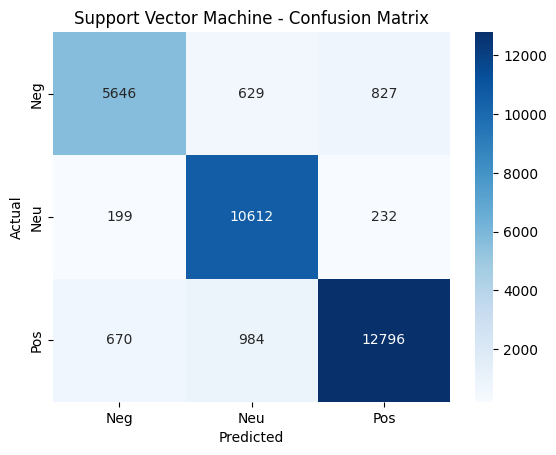

In [ ]:
# Model 3: Support Vector Machine
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} - Evaluation Metrics:\n")
    print(classification_report(y_true, y_pred))
    acc = accuracy_score(y_true, y_pred)
    print("Accuracy:", acc)

    cm = confusion_matrix(y_true, y_pred, labels=['negative', 'neutral', 'positive'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Neg', 'Neu', 'Pos'],
                yticklabels=['Neg', 'Neu', 'Pos'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Call the evaluation
evaluate_model("Support Vector Machine", y_test, y_pred_svm)




In evaluating the three models—Naive Bayes, Random Forest, and Support Vector Machine (SVM)—based on accuracy, precision, recall, and F1-score, it is clear that SVM outperformed the others with the highest accuracy of 89.13% and strong, balanced performance across all sentiment classes. SVM achieved excellent precision and recall, particularly for neutral and positive sentiments, resulting in a high macro-average F1-score of 0.88. Random Forest followed with an accuracy of 85.02%, showing consistent results and performing especially well in identifying neutral sentiment (recall: 0.94). It maintained a solid balance across all classes, making it a reliable model. On the other hand, Naive Bayes had the lowest accuracy at 71.89% and struggled significantly with detecting negative sentiment (recall: 0.42), though it performed relatively well with positive sentiment due to its high recall of 0.92. Overall, SVM proved to be the most effective model for sentiment classification, while Random Forest offered a strong, balanced alternative. Naive Bayes, although fast and simple, was the least accurate and may not be ideal for more nuanced sentiment analysis tasks.

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load train data
with open('stsa-train.txt', 'r', encoding='utf-8') as f:
    train_lines = f.readlines()
train_data = [(line[0], line[2:].strip()) for line in train_lines if line.strip()]
df_train = pd.DataFrame(train_data, columns=['Label', 'Text'])
df_train['Label'] = df_train['Label'].astype(int)

# Load test data
with open('stsa-test.txt', 'r', encoding='utf-8') as f:
    test_lines = f.readlines()
test_data = [(line[0], line[2:].strip()) for line in test_lines if line.strip()]
df_test = pd.DataFrame(test_data, columns=['Label', 'Text'])
df_test['Label'] = df_test['Label'].astype(int)

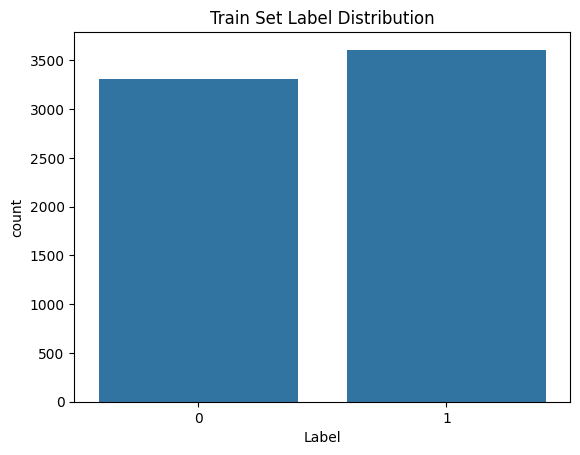

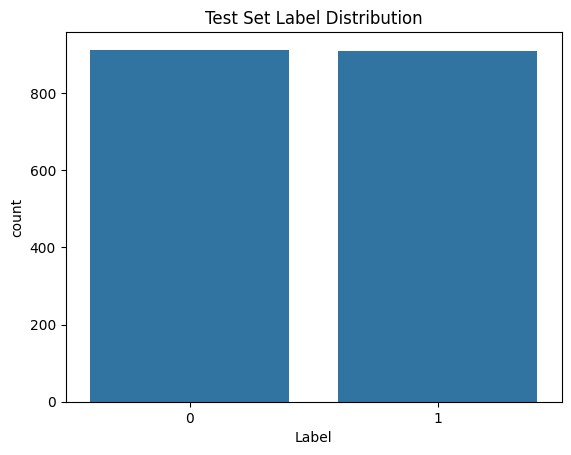

In [ ]:
# Class distribution
sns.countplot(data=df_train, x='Label')
plt.title("Train Set Label Distribution")
plt.show()

sns.countplot(data=df_test, x='Label')
plt.title("Test Set Label Distribution")
plt.show()


In [ ]:
# Average text length
df_train['text_length'] = df_train['Text'].apply(lambda x: len(x.split()))
df_test['text_length'] = df_test['Text'].apply(lambda x: len(x.split()))
print("Train text length:\n", df_train['text_length'].describe())
print("Test text length:\n", df_test['text_length'].describe())


Train text length:
 count    6920.000000
mean       19.299855
std         9.318495
min         2.000000
25%        12.000000
50%        19.000000
75%        25.000000
max        52.000000
Name: text_length, dtype: float64
Test text length:
 count    1821.000000
mean       19.232839
std         8.922846
min         2.000000
25%        12.000000
50%        18.000000
75%        25.000000
max        56.000000
Name: text_length, dtype: float64


In [ ]:
# Train, Validation and Test split
X = df_train['Text']
y = df_train['Label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Vectorize text
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(df_test['Text'])


In [ ]:
# Define models
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}
# Function to evaluate model
def evaluate_model(name, model, X_train, y_train, X_val, y_val, X_test, y_test):
    print(f"\nEvaluating {name}")

    # 10-fold cross-validation (F1 score)
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    print(f"Avg CV F1 Score: {cv_scores.mean():.4f}")

    # Train & predict on validation set
    model.fit(X_train, y_train)

    # predict on validation set
    val_preds = model.predict(X_val)

    # predict on test set
    test_preds = model.predict(X_test)

    # Metrics helper
    def get_metrics(y_true, y_pred):
        return {
            'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred),
            'Recall': recall_score(y_true, y_pred),
            'F1': f1_score(y_true, y_pred)
        }

    val_metrics = get_metrics(y_val, val_preds)
    test_metrics = get_metrics(y_test, test_preds)

    return name, val_metrics, test_metrics


In [ ]:
# Run evaluations
results = []
for name, model in models.items():
    results.append(evaluate_model(name, model, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, df_test['Label']))



Evaluating SVM
Avg CV F1 Score: 0.7966

Evaluating KNN
Avg CV F1 Score: 0.5234

Evaluating Decision Tree
Avg CV F1 Score: 0.6338

Evaluating Random Forest
Avg CV F1 Score: 0.7308



=== Validation Metrics Across Models ===
                SVM       KNN  Decision Tree  Random Forest
Accuracy   0.768786  0.528179       0.602601       0.700145
Precision  0.763089  0.549640       0.622159       0.708277
Recall     0.807479  0.529086       0.606648       0.722992
F1         0.784657  0.539167       0.614306       0.715559

=== Test Metrics Across Models ===
                SVM       KNN  Decision Tree  Random Forest
Accuracy   0.801208  0.520593       0.614498       0.717188
Precision  0.789418  0.519438       0.615901       0.697791
Recall     0.820682  0.529153       0.605061       0.764576
F1         0.804746  0.524251       0.610433       0.729659


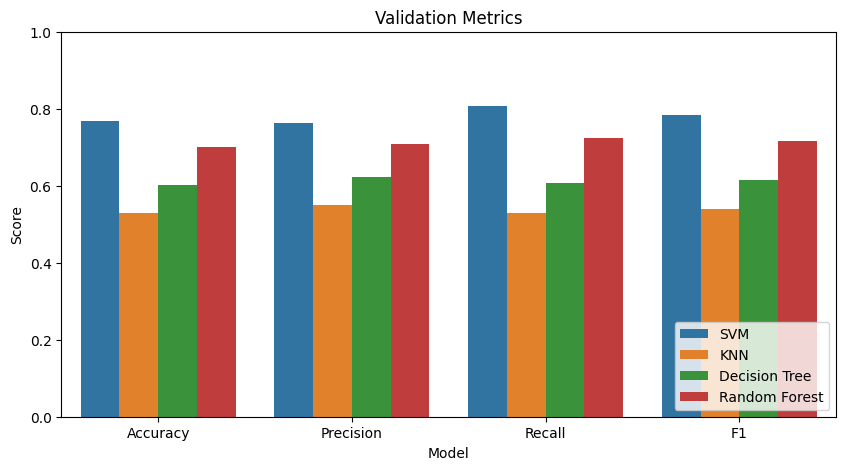

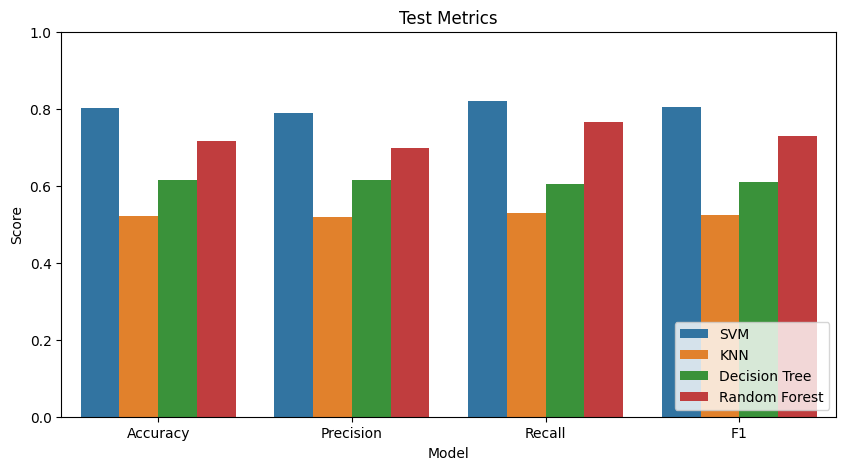

In [ ]:
# Format results into DataFrames
val_df = pd.DataFrame({name: val for name, val, test in results})
test_df = pd.DataFrame({name: test for name, val, test in results})

# Show side-by-side comparison of metrics
print("\n=== Validation Metrics Across Models ===")
print(val_df)

print("\n=== Test Metrics Across Models ===")
print(test_df)

# Melt for seaborn
val_df['Model'] = val_df.index
test_df['Model'] = test_df.index

val_melted = val_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
test_melted = test_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=val_melted, x='Model', y='Score', hue='Metric')
plt.title("Validation Metrics")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=test_melted, x='Model', y='Score', hue='Metric')
plt.title("Test Metrics")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from gensim.models import Word2Vec


In [ ]:
# Load a sample of 2000 rows from the dataset
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df = df[['Reviews']].dropna().head(2000)

# Display basic info
print("Total Reviews:", len(df))
print("Missing values:", df['Reviews'].isnull().sum())


Total Reviews: 2000
Missing values: 0


In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# dropping NaN rows
df = df.dropna()

# text preprocessing
def preprocess(text):
    text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z\s]", '', text.lower())
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    return ' '.join([w for w in tokens if w not in stop_words])

df['clean_text'] = df['Reviews'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


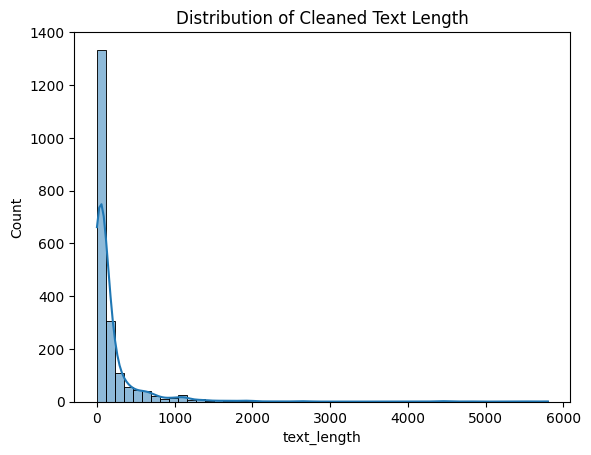

In [ ]:
df['text_length'] = df['clean_text'].apply(len)
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Cleaned Text Length")
plt.show()


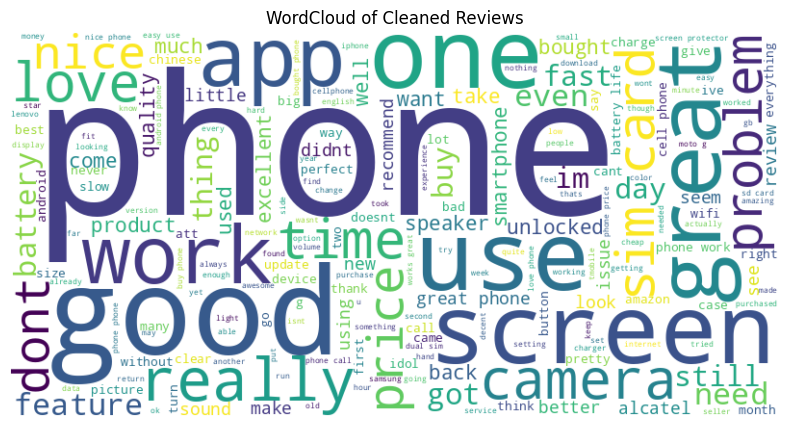

In [ ]:
combined_text = " ".join(df['clean_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Cleaned Reviews")
plt.show()


In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['clean_text'])

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e5e477d45e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96

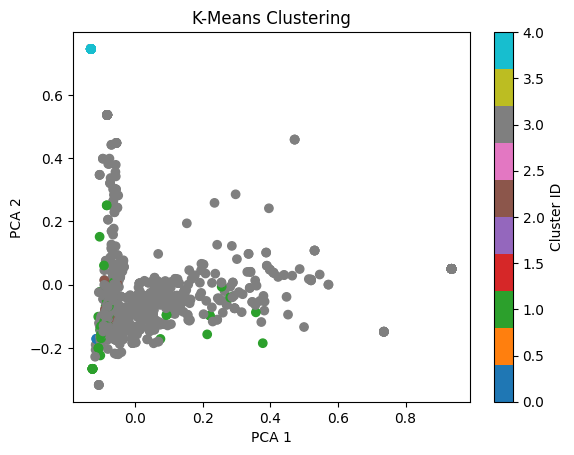

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_tfidf)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['kmeans_cluster'], cmap='tab10')
plt.title("K-Means Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster ID")
plt.show()


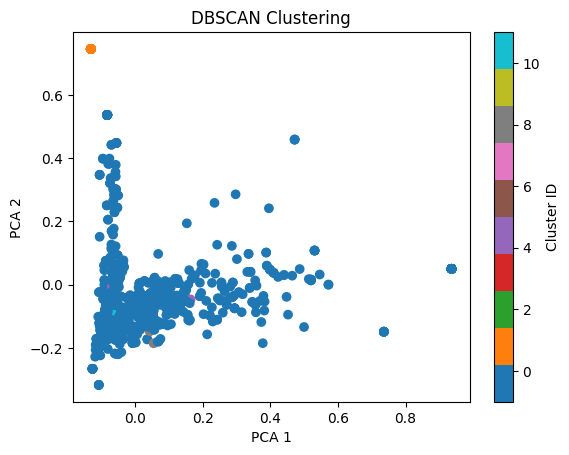

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
df['dbscan_cluster'] = dbscan.fit_predict(X_tfidf)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['dbscan_cluster'], cmap='tab10')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster ID")
plt.show()


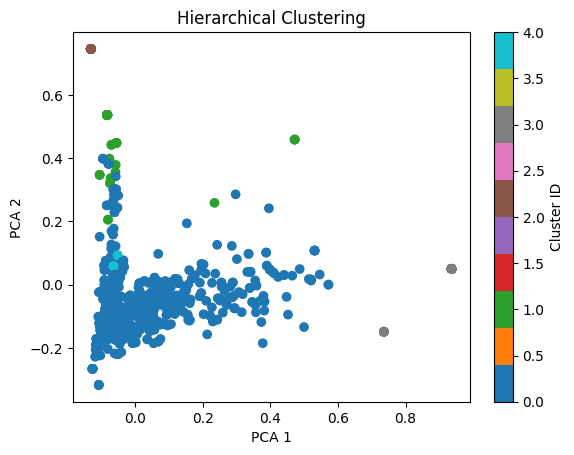

In [ ]:
agglo = AgglomerativeClustering(n_clusters=5)
df['hier_cluster'] = agglo.fit_predict(X_tfidf.toarray())

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['hier_cluster'], cmap='tab10')
plt.title("Hierarchical Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster ID")
plt.show()


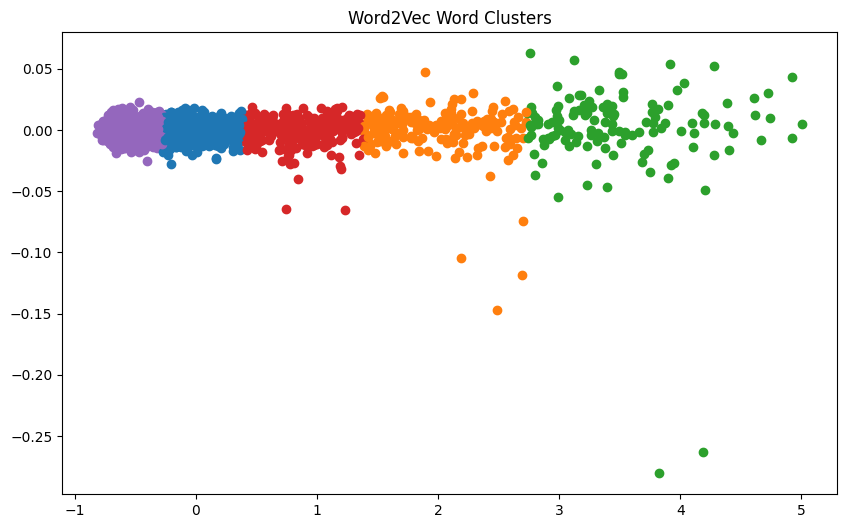

In [ ]:
# Tokenize sentences for Word2Vec
tokenized_sentences = df['clean_text'].apply(lambda x: x.split()).tolist()

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=2, workers=4)
word_vectors = [w2v_model.wv[word] for word in w2v_model.wv.index_to_key]

# Apply KMeans to word vectors
w2v_kmeans = KMeans(n_clusters=5, random_state=42)
w2v_labels = w2v_kmeans.fit_predict(word_vectors)

# Visualize Word2Vec Clusters
w2v_pca = PCA(n_components=2).fit_transform(word_vectors)
plt.figure(figsize=(10, 6))
for i, word in enumerate(w2v_model.wv.index_to_key):
    plt.scatter(w2v_pca[i, 0], w2v_pca[i, 1], c=f'C{w2v_labels[i]}')
plt.title("Word2Vec Word Clusters")
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**




In the clustering process,
**K-Means Clustering**: The clusters are somewhat clear, but some groups (like blue, gray, and light blue-green) tend to overlap.

**DBSCAN**: This method formed one big cluster in the center (blue) and identified a few smaller ones (orange, gray), which are likely outliers. It handles outliers better than the others.

**Hierarchical Clustering**: Most of the data ended up in one large cluster (blue), with only a few small clusters scattered around. It didn’t separate the data very well.

**Word2Vec-Based Clustering**: This gave the best results, with clear and well-separated clusters spread across the plot in a left-to-right pattern.

Word2Vec performed the best in forming meaningful and separate groups. K-Means was next, but its clusters overlapped more. DBSCAN created fewer clusters but was great at spotting outliers. Hierarchical clustering didn’t work as well, since most data got grouped into one big cluster with little structure.




# Mandatory Question
Overall, this assignment was manageable but not particularly easy. This assignment makes me  understand the concepts better. However, the clustering section posed some challenges, especially when interpreting the visualizations. Its a good hands on experience.

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

